# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1) Is the distribution of body temperatures normal?

In [4]:
def plot_ecdf(data, pdf=None):
    _ , ax = plt.subplots()
    x_data = np.sort(data)
    num_data = len(data)
    y_data = np.arange(1, num_data+1)/num_data
    ax.plot(x_data, y_data, marker='.', linestyle = 'none')
    
    if pdf == 'normal':
        mu = np.mean(data)
        sig = np.std(data)
        num_gen = int(1e4)
        pdf_data = np.random.normal(loc = mu, scale = sig, size = num_gen )
        x_pdf_data = np.sort(pdf_data)
        y_pdf_data = np.arange(1, num_gen+1)/num_gen
        ax.plot(x_pdf_data, y_pdf_data, marker='.', linestyle = 'none',\
                color = 'g', alpha = 0.5)
    
    return ax

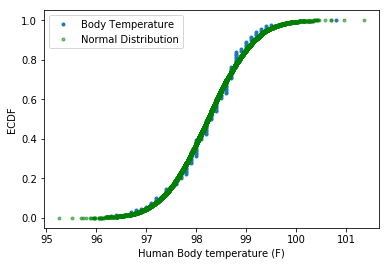

In [5]:
human_temp = df['temperature'].values
ax_ecdf = plot_ecdf(human_temp, pdf='normal')
ax_ecdf.set_xlabel('Human Body temperature (F)')
ax_ecdf.set_ylabel('ECDF')
ax_ecdf.legend(['Body Temperature', 'Normal Distribution'])

Our generated normal distribution appears to match the cumulative distribution function (CDF) of our data given the same mean and standard deviation as parameters.

#### Extra: let's see what uncertainties are associated with this sample mean.

In [6]:
# number of sampling
num_simu = int(1e6)
bs_body_temp = np.empty(num_simu)

# fix seed for reproducibility
np.random.seed(27)

for i in range(num_simu):
    # resampling with replacement
    bs_body = np.random.choice(human_temp, size = len(human_temp) )
    bs_body_temp[i] = np.mean(bs_body)

Our observation mean confidence interval at 95% does not include population mean but we don't know its confidence interval.

In [7]:
# 95% interval confidence on our observations
conf_inter95 = np.percentile(bs_body_temp, [2.5, 97.5])
print('Confidence interval at 95%: {}'.format(conf_inter95))

Confidence interval at 95%: [ 98.12384615  98.37461538]


### 2) Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

Answer: There are 130 samples which is on the relatively low but still **enough** for CLT (n > 30). As long as each temperature observation was recorded for different individuals then observations must be **independent**. Those individuals should be at rest and not sick so there is no sample bias.

### 3) Is the true population mean really 98.6 degrees F?
  * Would you use a one-sample or two-sample test? Why?
  * In this situation, is it appropriate to use the $t$ or $z$ statistic? 
  * Now try using the other test. How is the result be different? Why?

We will us a **one-sample test** as we don't have data associated with the population mean of 98.6F.

####  Z statistic
It is most often a one-sided test (aka one-tailed) where we have a **signed difference** (negative here) but one may choose to do a two-sided test (aka two-tailed) where we would quantify the **absolute** difference between two means.<br>
Knowing we have enough data hence observations are normally distributed, **it is apppropriate to use z-test**. Even if we don't know the population standard deviation, we can estimate it.<br>

We want to know the probability that sample mean minus population mean difference is at least as extreme as it is (-0.35 F).

Using the Central Limit Theorem (CLT), we center and reduce our observations so that the resulting $\mathcal{N}(0,1)$ probabilities are available in lookup tables:<br>
<center>$\large Z = \frac{ \overline{X} - \mu} {\sigma_{X}} $</center><br>
$\overline{X}$ sample mean <br>
$\mu$  population mean<br>
$\sigma_X$ standard error (adjusted population standard deviation)<br>

<center>$\large \sigma_X = \frac{\sigma} {\sqrt{n}}$<br></center>
$\sigma_X$ standard error (adjusted population standard deviation)<br>
$n$ number of samples<br>
$\sigma$ population standard deviation (Important: approximated by sample standard deviation because n > 30)

In [8]:
# true mean temperature
mean_popu_temp = 98.6

# mean and standard deviation from observations
mean_clt = np.mean(human_temp)
sigma_clt = np.std(human_temp)

# standard error
z_sigma_err = sigma_clt/np.sqrt(len(human_temp))

# center and reduce population mean
z_score = (mean_clt - mean_popu_temp) / z_sigma_err
print('Z-score = {:.3f}'.format(z_score))

Z-score = -5.476


In [9]:
# calculated p-value
stats.norm.cdf(z_score, loc=0, scale=1)

2.1761575829356528e-08

Looking at one-sided z-score [table like this one](http://www.stat.ufl.edu/~athienit/Tables/tables), we have the following result:<br>
<center>$P( \overline{X} \geq 98.6) = P( Z \leq -5.5) = P( Z \geq 5.5) =  1.9\mathrm{E}{-8} = 0.0000019 \% $ &nbsp; (p-value) </center><br>
It is very unlikely that 98.6 is the true mean.

Note: Most z-score table don't report Z values higher than 3 or 4. I actually have a printed table from my stats course from 2007 which gives a probability for 5.5

#### T statistic
T-test tables are also available one-side or two-sided.
P-value derived from two-sided test should be roughly twice its one-sided counterpart because our distribution is approximately normal or at least symmetrical. We don't know the population variance but t-test assumes it is unknown. Hence, we estimate the standard error a little differently and we will look at t-test tables that takes into account the number of samples. It should yield very similar result as our z-score.

<center>$\large \sigma_X = \frac{\sigma} {\sqrt{n-1}}$<br></center>
$\sigma_X$ standard error (adjusted population standard deviation)<br>
$n$ number of samples (n-1 is our degree of freedom here)<br>
$\sigma$ population standard deviation (Important: approximated by sample standard deviation because n > 30)

Degree of freedom = number of samples-1 (for one sample t-test)

In [10]:
# degree of freedom
degree_freedom = len(human_temp)-1
print('Degree of freedom = {}'.format(degree_freedom))

# standard error
t_sigma_err = sigma_clt/np.sqrt(degree_freedom)

# t-score
t_score = (mean_clt - mean_popu_temp) / t_sigma_err
print('T-score = {:.3f}'.format(t_score))

Degree of freedom = 129
T-score = -5.455


In [11]:
# calculated p-value
stats.t.cdf(t_score, degree_freedom, loc=0, scale=1)

1.2053160207780638e-07

Looking at t-score [table](http://socr.ucla.edu/Applets.dir/T-table.html), because we have a degree of freedom greater than 120, we will look at the infinity row. The maximum number in that last row is 3.291, still inferior to 5.455. All we know is the probability is significantly less than 0.0005 or 0.05%.<br>
<center>$P( \overline{X} \geq 98.6) = P(T \leq -5.5) = P(T \geq 5.5)<< 0.05\% $ &nbsp; (p-value) </center>

We can draw the same conclusion as our z-score where it is higly unlikely our true mean is 98.6

### 4) Draw a small sample of size 10 from the data and repeat both tests. 
* Which one is the correct one to use? 
* What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

#### Z-score

In [12]:
# fix seed for reproducibility
np.random.seed(27)

# select 10 samples at random (uniformly)
human_temp_small = np.random.choice(human_temp, size=10, replace=False)

In [13]:
# mean and standard deviation from observations
sigma_clt_small = np.std(human_temp_small)
mean_clt_small = np.mean(human_temp_small)

# z-test standard error
z_sigma_err_small = sigma_clt_small/np.sqrt(len(human_temp_small))

# z-score
z_score_small = (mean_clt_small - mean_popu_temp) / z_sigma_err_small
print('Z-score = {:.3f}'.format(z_score_small))

Z-score = -2.046


In [14]:
# calculated p-value
stats.norm.cdf(z_score_small, loc=0, scale=1)

0.020364572884515025

Looking at z-score table (one-sided), we have the following result:<br>
$P( \overline{X} \geq 98.6) = P( Z \leq -2.05) = P( Z \geq 2.05) = 1 - P( Z \leq 2.05) = 1 - 0.97982 = 0.0202 = 2.02 \% $&nbsp; (p-value)

#### T-score

In [15]:
# t-score, degree of freedom
degree_freedom_small = len(human_temp_small)-1
print('Degree of freedom = {}'.format(degree_freedom_small))

# t-score standard error
t_sigma_err_small = sigma_clt_small/np.sqrt(degree_freedom_small)

# t-score
t_score_small = (mean_clt_small - mean_popu_temp) / t_sigma_err_small
print('T-score = {:.3f}'.format(t_score_small))

Degree of freedom = 9
T-score = -1.941


In [16]:
# Interpolation of our t-score
t_proba_small = np.interp(np.abs(t_score_small), [1.833, 2.262], [0.05, 0.025])
# t(alpha, n) are t(0.025,9)=2.262 and t(0.05,9)=1.833
# alpha: probability
# n: degree of freedom

print('Probability from table = {:e}'.format(t_proba_small))

Probability from table = 4.369064e-02


In [17]:
# calculated p-value
stats.t.cdf(t_score_small, degree_freedom_small, loc=0, scale=1)

0.042068932730663984

Looking at t-test table (one-sided), we have the following result:<br>
$P( \overline{X} \geq 98.6) = P( T \leq -1.941) = P( T \geq 1.941) = 0.04369 = 4.37 \% $ &nbsp; (p-value)

Having only 10 samples, we should **use t-test table**. There isn't enough samples to make the assumption that our sample mean is normally distributed (CTL condition not satisfied).<br>
Here, both Z-score and T-score shows we can reject our null hypothesis. Population mean is most likely NOT 98.6F.<br>
However, there is a factor of more than 2x between Z-score and T-score. T-score is the one to be trusted in this situation.

### 5) At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

Margin of error depends on our choice of significance level.<br>
For normal distribution:
* 1.96*sigma for 5% significance level (95% confidence)
* 2.58*sigma for 1% significance level (99% confidence)

Let's choose 99% where only extreme values are considered abnormal.

In [18]:
# standard error is equal to the standard deviation of bootstrapping replicates
print('Standard error = {}'.format(z_sigma_err))
print('Bootstrap replicates Standard deviation = {}'.format(np.std(bs_body_temp)))

Standard error = 0.06405661469519337
Bootstrap replicates Standard deviation = 0.0640560524065296


In [19]:
# 1% margin of error
margin_error = 2.58 * z_sigma_err
print('Margin of error at 1% = {:.2f}F'.format(margin_error))

Margin of error at 1% = 0.17F


In [20]:
# 99% confidence interval based on margin of error
conf99_moe = [mean_clt-margin_error, mean_clt+margin_error]
print('Confidence interval at 99%: [{:.2f} {:.2f}]'.format(*conf99_moe))

# 99% interval confidence on our observations
conf_inter99 = np.percentile(bs_body_temp, [0.5, 99.5])
print('Confidence interval at 99% from hacker stats: [{:.2f} {:.2f}]'.format(*conf_inter99))

Confidence interval at 99%: [98.08 98.41]
Confidence interval at 99% from hacker stats: [98.08 98.41]


### 6) Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

We have data for male and female temperatures so we can us a two-sample test. Because the number of sample is low, we will compute t-score.

**Null hypothesis:** male population mean = female population mean<br>
**Alternative hypothesis:** male and female are different

In [21]:
# create boolean indexer for normal temperature as per our confidence interval
low_end, high_end = conf99_moe
crit_norm = (df.temperature >= low_end) & (df.temperature <= high_end)

# get male and female temperature data
human_male = df.loc[(df.gender == 'M') & crit_norm,'temperature'].values
human_female = df.loc[(df.gender == 'F') & crit_norm,'temperature'].values

# number of samples for each gender female then male
len(human_male), len(human_female)

(12, 15)

Two-sample t-score formula:<br>
$ \large T = \frac{\bar{Y_{1}} - \bar{Y_{2}} - 0}
            {\sqrt{\frac{{s^{2}_{1}}} {N_{1}} + \frac{{s^{2}_{2}}} {N_{2}}}}
            $
            where <i>$N_1$</i> and <i>$N_2$</i> are the
            sample sizes
            $\bar{Y_{1}}$ and $ \bar{Y_{2}} $ are
            the sample means
            ${s^{2}_{1}}$ and ${s^{2}_{2}}$ are the
            sample variances.

In [22]:
# compare male-female variance
np.var(human_female)/np.var(human_male)

0.78545454545453453

Because male and female variance are similar, we use this formula instead (more accurate variance when sample size are small):<br>
$ \large s_p =\sqrt{\frac{(N_1-1)s_1^2+(N_2-1)s_2^2}{N_1+N_2-2}}$<br>
and <br>
$\large T^{*}=\frac{{\bar{Y}}_1-{\bar{Y}}_2 - 0}{s_p \sqrt{\frac{1}{N_1}+\frac{1}{N_2}}}$


In [23]:
# difference of mean
mean_gender_diff = np.mean(human_female) - np.mean(human_male)
print('')

# pooled standard error
N_1 = len(human_female)
N_2 = len(human_male)
s_pool = np.sqrt(((N_1 - 1) * np.var(human_female) + (N_2 - 1) * np.var(human_male)) / (N_1 + N_2 - 2))

# combined standard error
std_error = s_pool * np.sqrt((1/N_1)+(1/N_2))

# t-score
t_score_gender = mean_gender_diff / std_error
print('Two-sample T-score = {:.3f}'.format(t_score_gender))


Two-sample T-score = 0.332


In [24]:
# t-score, degree of freedom
degree_freedom2 = len(human_female) + len(human_male) - 2
print('Degree of freedom = {}'.format(degree_freedom2))

Degree of freedom = 25


In [25]:
# Interpolation of our t-score
t_proba_gender = np.interp(np.abs(t_score_gender), [0.256, 0.390], [0.4, 0.35])
print('Probability from table = {:e}'.format(t_proba_gender))

Probability from table = 3.716491e-01


In [26]:
# calculated p-value (factor of 2 because we test for non equality)
stats.t.cdf(-t_score_gender, degree_freedom2, loc=0, scale=1)*2

0.74267126148021845

Looking at t-test table (one-sided), we have the following result:<br>
<center>$P( \overline{Y_2} \neq \overline{Y_1}) = P( \mid T \mid \geq 0.332) = 0.74267 = 74.3 \% $ &nbsp; (p-value)</center>

There is a 37% chance that we will get a difference in mean temperature between male and female at least as extreme as in our samples. This result rules out our null hypothesis. Male and female do not have the same mean poppulation temperature. There are other effect like heart rate that could weight in.

### Conclusion
It appears that the true human body temperature of 98.6 F may not be valid anymore and this value changes at least based on people's gender.

# Extras

### Question 3: Hacker statistics Solution
The mean temperature of our data set is 98.25 degree F which is lower than the true population mean.<br>

In [27]:
mean_obs_temp = np.mean(human_temp)
print('{:.2f} F'.format(mean_obs_temp))

98.25 F


Let's say our mean temperature is actually the same as the true mean. This is our null hypothesis.<br>
We can repeat our experimental many times by producing bootstrapping replicates using **one-sample test** as we are comparing one set of data to a single value.

In [28]:
# Adjust the mean to match the other mean first to verify our hypothesis
human_temp_shifted = human_temp - mean_obs_temp + mean_popu_temp

num_simu = int(1e6)
bs_temp = np.empty(num_simu)

for i in range(num_simu):
    # resampling with replacement
    bs_body = np.random.choice(human_temp_shifted, size = len(human_temp_shifted) )
    bs_temp[i] = np.mean(bs_body)
    
# bootstrapped difference of mean
bs_body_temp_diff = bs_temp - mean_popu_temp

Observed difference in mean values = -0.35


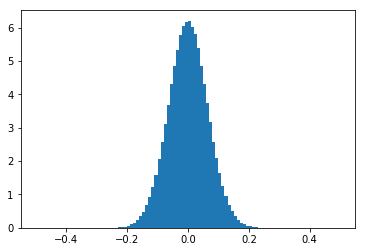

In [29]:
# test statistic: difference of mean
# Observed-population difference of mean
obs_mean_diff = mean_obs_temp - mean_popu_temp
print('Observed difference in mean values = {:.2f}'.format(obs_mean_diff))

# plot histogram of mean difference (test statistic)
_ = plt.hist(bs_body_temp_diff, bins = 100, range=(-0.5,0.5), normed=True)

In [30]:
# compute p-value
# Percent chance of having a mean difference at least as extreme as in our observation assuming null hypothesis is true.
# less than inequality because the observed difference is negative
p_value = np.sum( bs_body_temp_diff <= obs_mean_diff ) / len(bs_body_temp_diff)
print('p-value = {:e}'.format(p_value))

p-value = 0.000000e+00


There is NOT one case out of 1 million where the difference in mean is at least as extreme as -0.35 F assuming equal means. This result suggests our observed mean is more likely to be the true mean (i.e not 98.6F as suggested).

### Question 6: Hacker Statistic Solution
Hacker statistics do not make any assunption on distribution.

In [31]:
# create boolean indexer for normal temperature as per our confidence interval
low_end, high_end = conf99_moe
crit_norm = (df.temperature >= low_end) & (df.temperature <= high_end)

# get male and female temperature data
human_male = df.loc[(df.gender == 'M') & crit_norm,'temperature'].values
human_female = df.loc[(df.gender == 'F') & crit_norm,'temperature'].values

# number of samples for each gender female then male
len(human_male), len(human_female)

(12, 15)

We want to know whether male temperature and female temperature come from the same distribution.<br>
We will perform a two sample test using permutation.<br> 
Test statistic: difference of mean <br>
Null hypothesis: there is no difference between male and female normal temperatures.

In [32]:
# initial difference of mean
mean_gender_diff = np.mean(human_male) - np.mean(human_female)

# combine data
humans = np.concatenate((human_male,human_female))

# number of permutation
num_perm = int(1e5)
mean_gender_perm_diff = np.empty(num_perm)

for i in range(num_perm):
    # permutation
    humans_perm = np.random.permutation(humans)
    human_male_perm = humans_perm[:len(human_male)]
    human_female_perm = humans_perm[len(human_male):]

    # mean difference
    mean_gender_perm_diff[i] = np.mean(human_male_perm) - np.mean(human_female_perm)

# p value based on permutation simulation
np.sum( mean_gender_perm_diff >=  mean_gender_diff) / len(mean_gender_perm_diff)

0.69096999999999997

P-value is not statistically significant (>0.01) so we are likely to reject the null hypothesis. Male and female are not likely to have the same temperature.**Yes there is a significant difference.**